## **Fraudulent transaction detection in credit card activity**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
import sklearn.preprocessing

!pip install --user imblearn
!pip install --user utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc



import warnings
warnings.filterwarnings('ignore')

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=27eb96817940c7ef6153cb26a6c254963592962836bf936b72209c1f4dc63b75
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


The features V1-V28 are masked features. As data related to credit card are supposed to be be hidden or secretive. Class 0 and 1 tells us if the transaction is fraudulent or not. Amount tells us what is the amount sent.
0 -> not fradulent
1 -> fraudulent

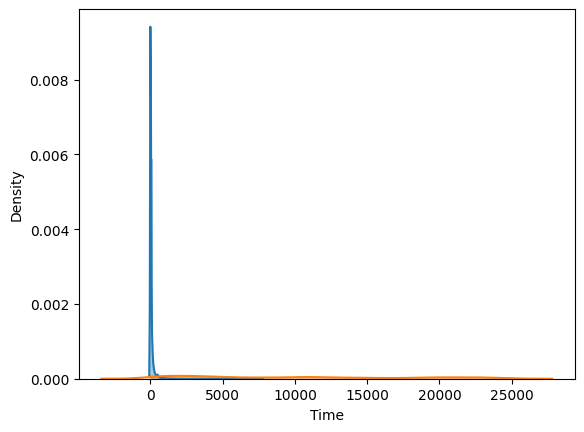

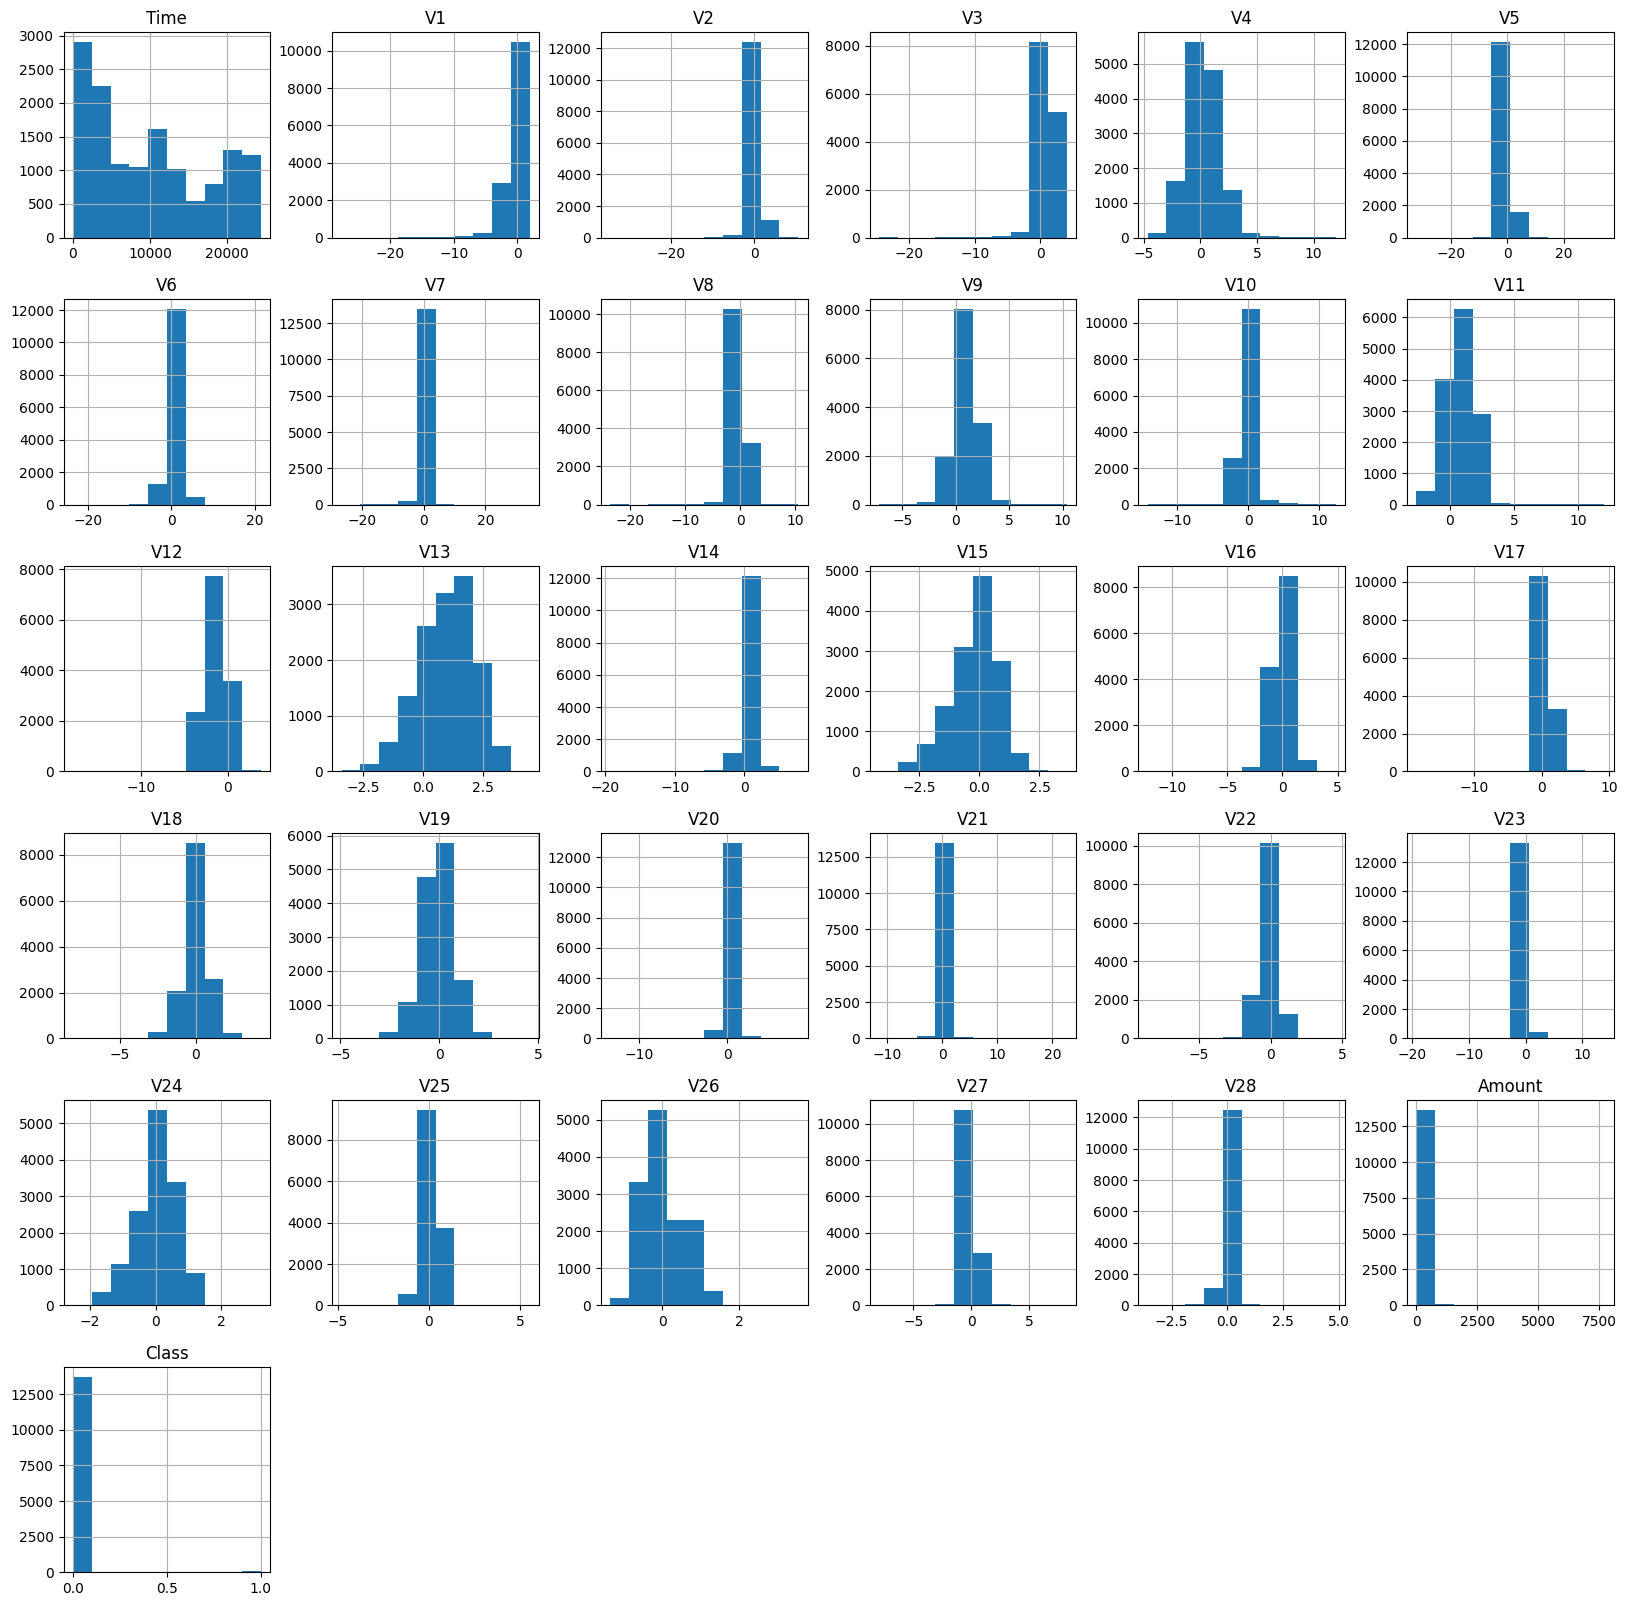

In [3]:
d=pd.read_csv('/content/drive/MyDrive/CreditCard.csv')
sns.distplot(d['Amount'])
sns.distplot(d['Time'])
d.hist(figsize=(20,20))
plt.show()

The above shows us relationship between the class and the masked features. We can see that the class values are varying in negatives to high positive values and hence have to clean it.

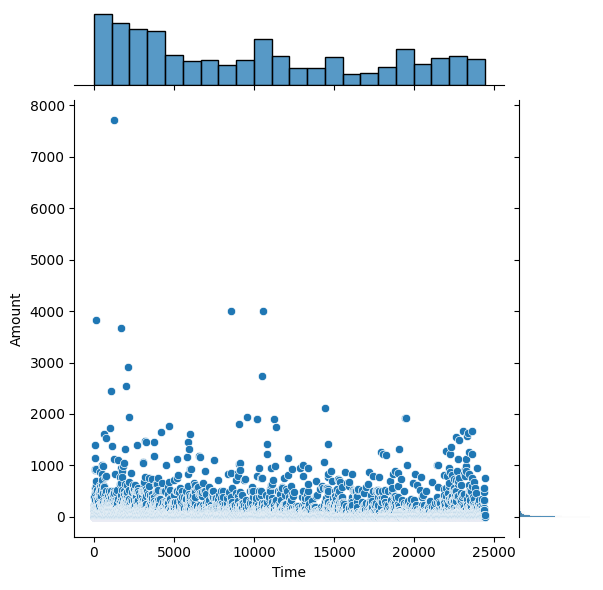

In [4]:
sns.jointplot(x= 'Time', y= 'Amount', data= d)

The plot shows relationship between two variables (Time and Amount in this case) along with their individual distributions.

In [5]:
class0 = d[d['Class']==0] #class 0 is a data frame which stores values of the dataset, where class is 0
print("Number of rows:",len(class0))
class0.head()

Number of rows: 13713


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
class1 = d[d['Class']==1] #class 1 is a data frame which stores values of the dataset, where class is 1
print("Number of rows:",len(class1))
class1.head()

Number of rows: 56


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1.0


In [7]:
temp = shuffle(class0)
d1 = temp.iloc[:2000,:]
#Why is this done?
#Shuffled and selected 2000 rows only

In this datasets, there is a significant imbalance between the classes. There are many more instances of class 0 compared to class 1. This imbalance can affect the performance of machine learning models, leading to a bias toward the majority class.

In [8]:
frames = [d1, class1]
df_temp = pd.concat(frames) #Combined both class0 with lesser rows and class1 dataframes.
df_temp.info()
df= shuffle(df_temp)
df.to_csv('creditcardsampling.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 2056 entries, 8085 to 12369
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2056 non-null   int64  
 1   V1      2056 non-null   float64
 2   V2      2056 non-null   float64
 3   V3      2056 non-null   float64
 4   V4      2056 non-null   float64
 5   V5      2056 non-null   float64
 6   V6      2056 non-null   float64
 7   V7      2056 non-null   float64
 8   V8      2056 non-null   float64
 9   V9      2056 non-null   float64
 10  V10     2056 non-null   float64
 11  V11     2056 non-null   float64
 12  V12     2056 non-null   float64
 13  V13     2056 non-null   float64
 14  V14     2056 non-null   float64
 15  V15     2056 non-null   float64
 16  V16     2056 non-null   float64
 17  V17     2056 non-null   float64
 18  V18     2056 non-null   float64
 19  V19     2056 non-null   float64
 20  V20     2056 non-null   float64
 21  V21     2056 non-null   float64
 22  V

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    4000 non-null   float64
 1   V1      4000 non-null   float64
 2   V2      4000 non-null   float64
 3   V3      4000 non-null   float64
 4   V4      4000 non-null   float64
 5   V5      4000 non-null   float64
 6   V6      4000 non-null   float64
 7   V7      4000 non-null   float64
 8   V8      4000 non-null   float64
 9   V9      4000 non-null   float64
 10  V10     4000 non-null   float64
 11  V11     4000 non-null   float64
 12  V12     4000 non-null   float64
 13  V13     4000 non-null   float64
 14  V14     4000 non-null   float64
 15  V15     4000 non-null   float64
 16  V16     4000 non-null   float64
 17  V17     4000 non-null   float64
 18  V18     4000 non-null   float64
 19  V19     4000 non-null   float64
 20  V20     4000 non-null   float64
 21  V21     4000 non-null   float64
 22  

<Axes: >

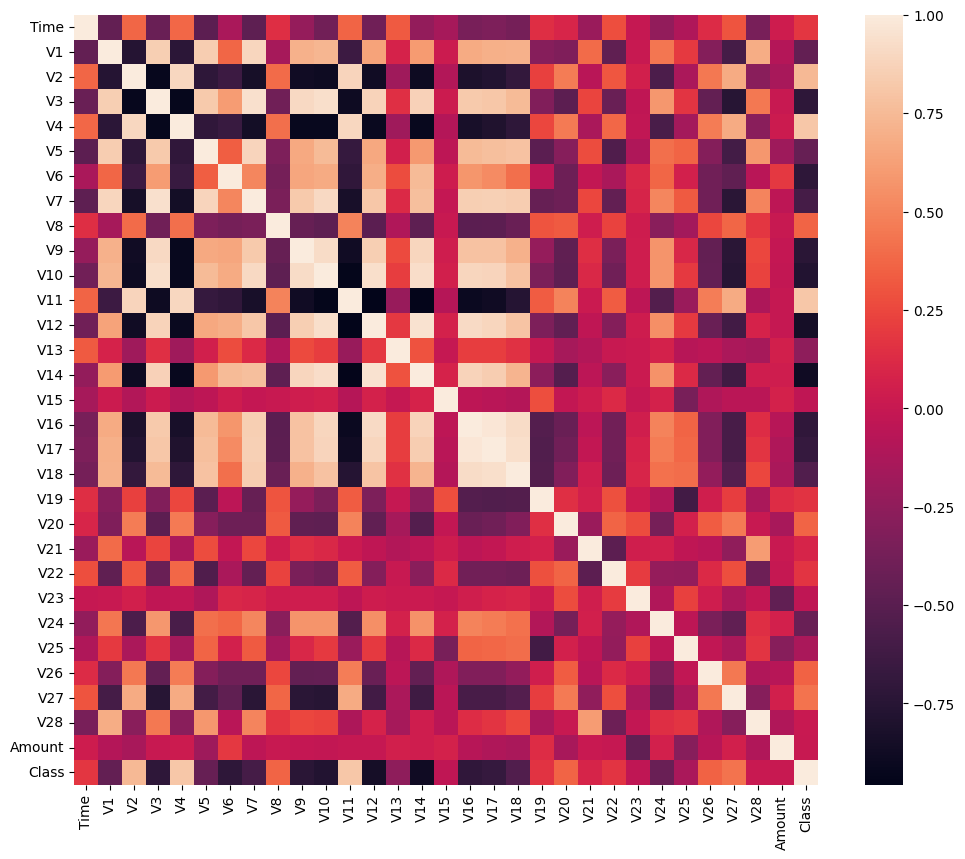

In [9]:
# SMOTE
import imblearn
from imblearn.over_sampling import  SMOTE
oversample=SMOTE()
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
data=pd.concat([X,Y],axis=1)
d=data.values
data=pd.DataFrame(d,columns=names)
#sns.countplot('Class', data=data)

data.info()
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.
Correlation matrix shows the correlation between all the features.


In [10]:
correlations = data.corrwith(data['Class']).drop(labels='Class')
print(correlations.sort_values(ascending=False))

V4        0.814672
V11       0.814638
V2        0.744199
V27       0.421483
V20       0.362549
V8        0.360224
V26       0.354365
Time      0.175908
V22       0.172120
V19       0.162010
V21       0.083651
V28       0.006501
Amount    0.001921
V23      -0.033455
V15      -0.036589
V25      -0.137676
V13      -0.255671
V24      -0.422111
V5       -0.439870
V1       -0.458055
V18      -0.536988
V7       -0.602383
V17      -0.679304
V16      -0.709983
V6       -0.715910
V3       -0.718243
V9       -0.735788
V10      -0.778151
V12      -0.848884
V14      -0.874401
dtype: float64


Correlation of all features with the column 'class' sorted in ascending values.
we can see the features most correlated to the predictor 'class'

In [11]:
# Feature Scaling
scaler = StandardScaler()
frames= ['Time', 'Amount']
x= data[frames]
d_temp = data.drop(frames, axis=1)
temp_col=scaler.fit_transform(x)
scaled_col = pd.DataFrame(temp_col, columns=frames)
d_scaled = pd.concat([scaled_col, d_temp], axis =1)
y = data['Class']
d_scaled.shape

(4000, 31)

Feature scaling, particularly standardization using StandardScaler, is done to normalize the features in a dataset so that they have a mean of 0 and a standard deviation of 1.

**Selecting features having correlation value > 0.01**

In [12]:
correlated_columns = correlations[abs(correlations) > 0.05].index.tolist()
print(len(correlated_columns))

X=d_scaled[correlated_columns]
Y=d_scaled['Class']

X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size = 0.2, random_state = 6,stratify=Y)

26


Accuracy with scaled features gave more accuracy, but could also use without scaling

**Dimensionality Reduction - Another technique for feature selection**

In [13]:
# # Dimensionality Reduction
# from sklearn.decomposition import PCA
# pca = PCA(n_components=7)
# X_temp_reduced = pca.fit_transform(d_scaled)

# names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']
# X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
# Y=d_scaled['Class']
# new_data=pd.concat([X_reduced,Y],axis=1)
# new_data.to_csv('finaldata.csv')

# X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.2, random_state = 1,stratify=Y)

**Logistic Regression for selecting features**

In [14]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
y_pred_lr

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_lr))

from sklearn.model_selection import GridSearchCV
lr_model = LogisticRegression()
lr_params = {'penalty': ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lr= GridSearchCV(lr_model, param_grid = lr_params)
grid_lr.fit(X_train, y_train)

grid_lr.best_params_

y_pred_lr=grid_lr.predict(X_test)
print(classification_report(y_test,y_pred_lr))
print("Accuracy : {:.2f} %".format(accuracy_score(y_test, y_pred_lr)*100))

[[394   6]
 [  0 400]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       400
         1.0       0.99      1.00      0.99       400

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

Accuracy : 99.38 %


In [15]:
# Support Vector Machine

from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

svc_param=SVC(kernel='rbf',gamma=0.01,C=100)
svc_param.fit(X_train,y_train)
y_pred_svc=svc_param.predict(X_test)
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       400
         1.0       1.00      0.98      0.99       400

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800

[[399   1]
 [  8 392]]
Best Accuracy: 99.91 %
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [16]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree=dtree.predict(X_test)

print(classification_report(y_test,y_pred_dtree))
print(confusion_matrix(y_test,y_pred_dtree))

d_tree_param=DecisionTreeClassifier()
tree_parameters={'criterion':['gini','entropy'],'max_depth':list(range(2,4,1)),
                 'min_samples_leaf':list(range(5,7,1))}
grid_tree=GridSearchCV(d_tree_param,tree_parameters)
grid_tree.fit(X_train,y_train)
y_pred_dtree=grid_tree.predict(X_test)

print(classification_report(y_test,y_pred_dtree))
print("Accuracy : {:.2f} %".format(accuracy_score(y_test, y_pred_dtree)*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      0.99      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

[[399   1]
 [  2 398]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       400
         1.0       0.97      0.99      0.98       400

    accuracy                           0.98       800
   macro avg       0.98      0.98      0.98       800
weighted avg       0.98      0.98      0.98       800

Accuracy : 98.12 %


In [17]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(n_estimators=5)
randomforest.fit(X_train,y_train)
y_pred_rf=randomforest.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print("Accuracy : {:.2f} %".format(accuracy_score(y_test, y_pred_rf)*100))

[[400   0]
 [  1 399]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Accuracy : 99.88 %


In [18]:
# Reshaping 3D Arrays to 2D Arrays to Run for KNN

import numpy as np
x_train = np.reshape(X_train,(len(X_train),-1))
x_test = np.reshape(X_test,(len(X_test),-1))
print(x_train)
print(y_train)

[[-3.96289851e-01 -1.52882254e+00  4.61134496e+00 ...  7.27394861e-01
   3.25259794e-01  8.76366440e-01]
 [ 1.34091472e+00  1.36935741e+00 -3.05860424e-01 ...  5.11959404e-01
  -3.19865185e-01 -2.06358400e-03]
 [-1.33323125e+00 -9.02658887e-01  9.62986614e-01 ... -4.97070870e-01
  -3.29520776e-01  1.63158279e-01]
 ...
 [ 6.62512899e-01  3.79613107e-01 -1.85150697e+00 ...  1.37359390e-02
   1.71425423e-01  1.53166790e-02]
 [ 3.66779901e-01 -6.69767898e-01  8.77945300e-02 ... -9.68409966e-01
   8.25987355e-01  4.95457300e-02]
 [-1.52932824e+00  1.06291054e+00  2.18978500e-02 ...  4.46072930e-01
  -5.02619142e-01  4.92481710e-02]]
2707    1.0
383     0.0
1122    0.0
215     0.0
2655    1.0
       ... 
2113    1.0
1493    0.0
671     0.0
663     0.0
1336    0.0
Name: Class, Length: 3200, dtype: float64


In [19]:
# K Nearest Neighbor

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_test,y_pred_knn))
print("Accuracy : {:.2f} %".format(accuracy_score(y_test, y_pred_knn)*100))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       400
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Accuracy : 99.75 %


In [20]:
# XGBoost

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xg=xgb.predict(X_test)
print(classification_report(y_test,y_pred_xg))
print("Accuracy : {:.2f} %".format(accuracy_score(y_test, y_pred_xg)*100))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       400
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

Accuracy : 99.88 %


It might be over fitting and hence we experiment with CNN as well

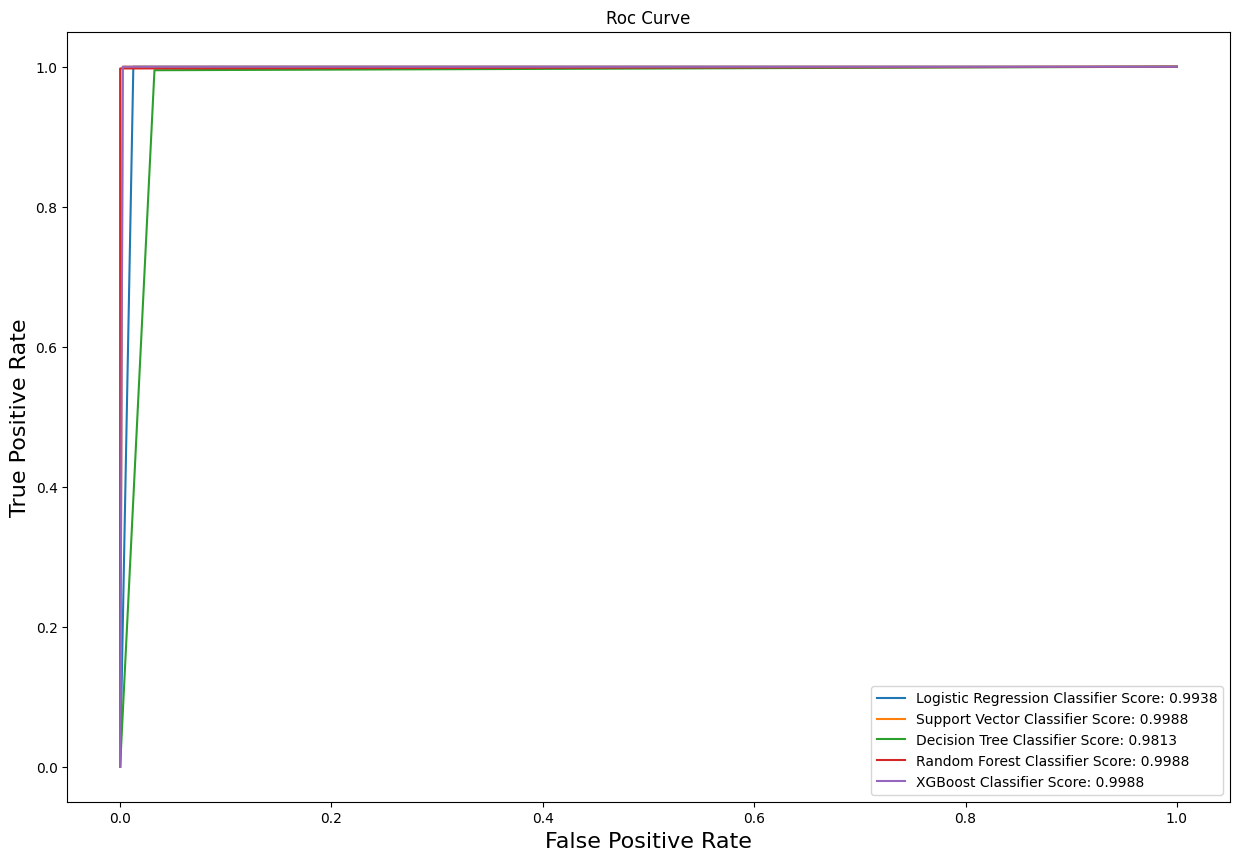

In [21]:
# ROC

from sklearn.metrics import roc_curve,roc_auc_score
lg_fpr,lg_tpr,lg_threshold=roc_curve(y_test,y_pred_lr)
svc_fpr,svc_tpr,svc_threshold=roc_curve(y_test,y_pred_svc)
dtree_fpr,dtree_tpr,dtree_threshold=roc_curve(y_test,y_pred_dtree)
rf_fpr,rf_tpr,rf_threshold=roc_curve(y_test,y_pred_rf)
xg_fpr,xg_tpr,xg_threshold=roc_curve(y_test,y_pred_xg)


plt.figure(figsize=(15,10))
plt.title("Roc Curve")
plt.plot(lg_fpr,lg_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_lr)))
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_svc)))
plt.plot(dtree_fpr, dtree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_dtree)))
plt.plot(rf_fpr,rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_rf)))
plt.plot(xg_fpr,xg_tpr, label='XGBoost Classifier Score: {:.4f}'.format(roc_auc_score(y_test, y_pred_xg)))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()
plt.show()

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [23]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [26]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [27]:
X_train.shape, X_test.shape

((3200, 26, 1), (800, 26, 1))

In [28]:
epochs=75
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.15))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.06))

model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 32)            96        
                                                                 
 batch_normalization (Batch  (None, 25, 32)            128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 25, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            4160      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 64)            256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0

In [30]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train, epochs=75, validation_data=(X_test, y_test), verbose=1)

Epoch 1/75
100/100 [==============================] - 8s 33ms/step - loss: 0.6597 - accuracy: 0.5994 - val_loss: 0.6855 - val_accuracy: 0.5000
Epoch 2/75
100/100 [==============================] - 3s 30ms/step - loss: 0.4984 - accuracy: 0.7772 - val_loss: 0.5715 - val_accuracy: 0.6862
Epoch 3/75
100/100 [==============================] - 2s 20ms/step - loss: 0.2473 - accuracy: 0.9284 - val_loss: 0.1761 - val_accuracy: 0.9787
Epoch 4/75
100/100 [==============================] - 2s 17ms/step - loss: 0.1283 - accuracy: 0.9619 - val_loss: 0.0671 - val_accuracy: 0.9862
Epoch 5/75
100/100 [==============================] - 2s 17ms/step - loss: 0.1001 - accuracy: 0.9728 - val_loss: 0.0513 - val_accuracy: 0.9862
Epoch 6/75
100/100 [==============================] - 2s 17ms/step - loss: 0.0940 - accuracy: 0.9700 - val_loss: 0.0551 - val_accuracy: 0.9862
Epoch 7/75
100/100 [==============================] - 2s 17ms/step - loss: 0.0906 - accuracy: 0.9750 - val_loss: 0.0507 - val_accuracy: 0.9875

In [32]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Accuracy : {:.2f} %".format(test_acc*100))
print("Test loss : {:.2f} %".format(test_loss))

25/25 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 0.9962
Accuracy : 99.62 %
Test loss : 0.02 %


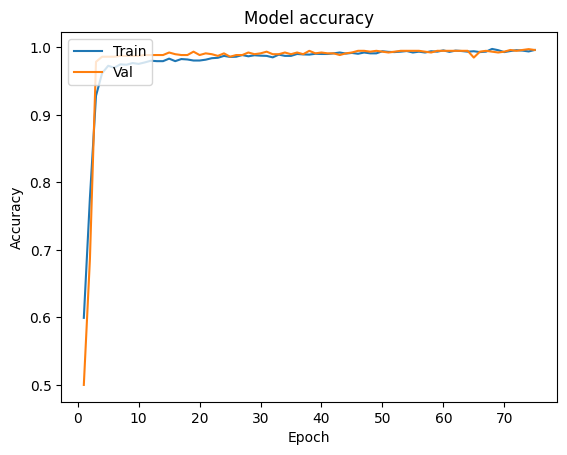

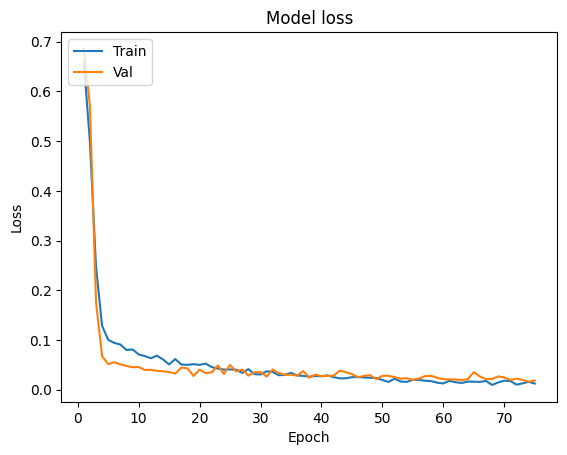

In [33]:
epoch_range = range(1, epochs+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

  # Plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

**To check if the model is overfitting**

In [34]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Training Accuracy : {:.2f} %".format(train_acc * 100))
print("Training Loss : {:.2f}".format(train_loss))
print("Test Accuracy : {:.2f} %".format(test_acc * 100))
print("Test Loss : {:.2f}".format(test_loss))


25/25 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9962
Training Accuracy : 99.62 %
Training Loss : 0.01
Test Accuracy : 99.62 %
Test Loss : 0.02


The training and test accuracies are very close to each other (99.44% vs. 99.00%), and the training and test losses are also very similar (0.01 vs. 0.02). This indicates that the model is performing well on both the training and test datasets, which suggests that it has generalized well to unseen data.

If the model were overfitting, you would typically see a much higher accuracy on the training data compared to the test data, and a significantly lower loss on the training data compared to the test data.

In this case, the small differences between the training and test metrics suggest that the model is not overfitting and is likely generalizing well to new data.






